In [1]:
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


- (442, 10) is 2d tuple format
- (442,) is 1d format

Tuple is read only data

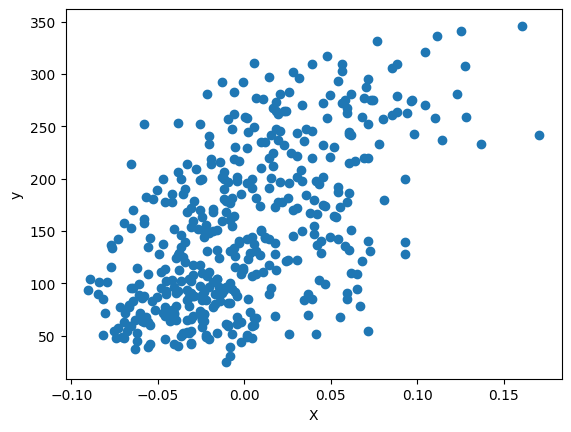

In [4]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [5]:
X = diabetes.data[:,2]
y = diabetes.target

# 경사하강법

## 경사하강법에 대해

In [6]:
# 임의의 값으로 시작.
w = 1.0
b = 1.0

In [7]:
# 첫번째 샘플에서 예측값 구하기.
y_hat = X[0]*w +b
print(y_hat)

1.0616962065186832


In [8]:
w_inc = w + 0.1
y_hat_inc = X[0]*w_inc + b
print(y_hat_inc)

1.0678658271705517


In [9]:
# get w rate 변화율을 계산
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [11]:
b_inc = b + 0.1
y_hat_inc = X[0]*w + b_inc
print(y_hat_inc)

1.1616962065186833


In [13]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


- b에 대한 변화율은 1.0이 나온다.

In [14]:
err = y[0] - y_hat
w_new = w + w_rate*err
b_new = b+ 1*err
print(w_new, b_new)

10.250624555903848 150.9383037934813


- 이전 값 1.161696, 1.0 에 비해 큰 폭으로 증가한 것을 알 수 있다.

In [17]:
y_hat = X[1] * w_new + b_new
err = y[1] - y_hat
w_rate = X[1] # 두번째 변화율은 샘플값 그 자체이기 때문.
w_new = w_new  + w_rate*err
b_new = b_new + 1*err
print(w_new,b_new)

14.132317616380695 75.52764127612656


## 전체 샘플을 반복하여 가중치와 절편을 조절

In [19]:
for x_i, y_i in zip(X,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1*err
print(w,b)

587.8654539985616 99.4093556453094


- 위의 값이 반복으로 얻어낸 값임.

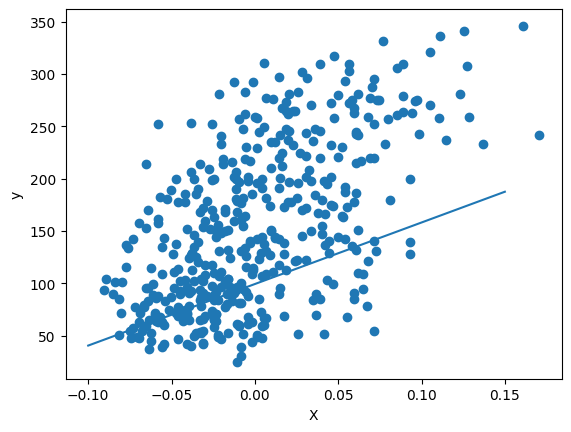

In [20]:
plt.scatter(X,y)
pt1 = (-0.1,-0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('X')
plt.ylabel('y')
plt.show()


## 여러 에포크를 반복하기

In [21]:
for i in range(1,100):
    for x_i, y_i in zip(X,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1*err
print(w,b)

913.5973364346786 123.39414383177173


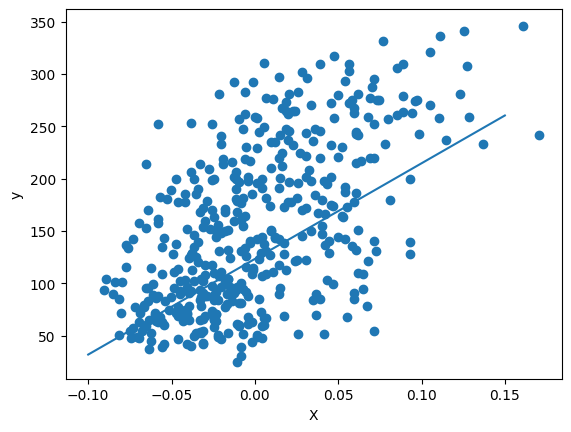

In [22]:
plt.scatter(X,y)
pt1 = (-0.1,-0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

- 여러 Epoch를 수행한 결과 좀 더 나아진 결과를 얻을 수 있음.

## 모델로 예측하기

In [24]:
X_new = 0.18
y_pred = X_new*w +b
print(y_pred)

287.8416643900139


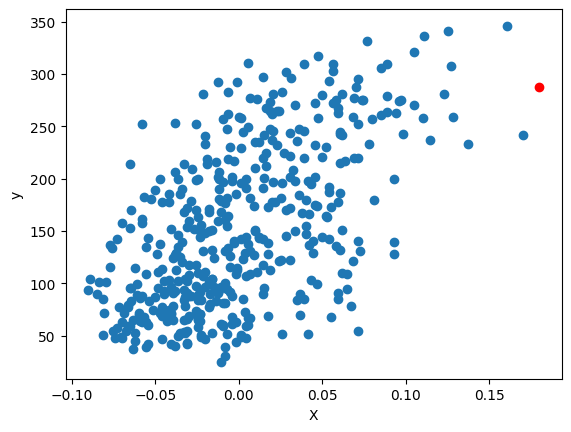

In [26]:
plt.scatter(X,y)
plt.scatter(X_new,y_rped,c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# 선형 회귀를 위한 뉴런

- Definition Neuron Class

In [27]:
# 클래스는 변수와 메서드로 구분된다.
# - 관례상 클래스는 대문자로 시작한다.

class Neuron:
    # 객체를 만들 때, 맨처음 초기화 되는 Method를 __init__ 메서드라고 한다.
    def __init__(self):
        #self 는 생성된 객체 자기 자신을 의미한다.(instance라 생각하면 된다.)
        # w,b의 값을 생성시에 초기화 해준다.
        self.w = 1.0
        self.b = 1.0
        #초기화 작업을 수행.
        
    #정방향 계산 만들기.
    def forpass(self, X):
        y_hat = X * self.w + self.b #직선 방정식을 계산한다.
        return y_hat
    
    #역방향 계산
    def backprop(self, X, err):
        # 가중치 없데이트 -(y-y_hat)*x
        # 절편 업데이트 -(y-y_hat)
        w_grad = X * err
        b_grad = 1 * err
        return w_grad, b_grad
        
    #훈련을 위한 fit() method 를 구현
    def fit(self, X,y, epochs = 100):
        for i in range(epochs):
            for x_i, y_i in zip(X,y):
                y_hat = self.forpass(x_i)
                err = -(y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i,err)
                self.w -= w_grad
                self.b -= b_grad
                
    

In [28]:
neuron = Neuron()
neuron.fit(X,y)

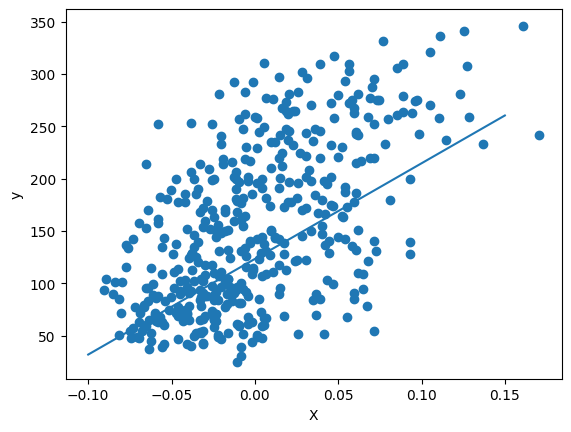

In [29]:
plt.scatter(X,y)
pt1 = (-0.1, -0.1*neuron.w + neuron.b)
pt2 = (0.15, 0.15*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('X')
plt.ylabel('y')
plt.show()